# **Modules imports**

In [ ]:
import numpy as np

import keras
from keras import layers

import matplotlib.pyplot as plt

# **Question 1**

In [ ]:
# Data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# One-hot encode output labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Function to create the model with specified architecture
def create_model():
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(10, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

In [ ]:
loss_functions = ['mean_squared_error', 'mean_absolute_error', 'categorical_crossentropy']
histories = {}

# Train the model with each loss function
for loss_fn in loss_functions:
    print(f"\nTraining with {loss_fn}...")

    # Create a new model instance for each loss function
    model = create_model()

    # Compile the model
    model.compile(optimizer='sgd', loss=loss_fn, metrics=['accuracy'])

    # Train the model
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=50,
        validation_split=0.1,
        verbose=1
    )

    # Store the training history
    histories[loss_fn] = history.history


Training with mean_squared_error...
Epoch 1/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1042 - loss: 0.0911 - val_accuracy: 0.1617 - val_loss: 0.0894
Epoch 2/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1824 - loss: 0.0889 - val_accuracy: 0.2370 - val_loss: 0.0873
Epoch 3/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2394 - loss: 0.0869 - val_accuracy: 0.2963 - val_loss: 0.0852
Epoch 4/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2988 - loss: 0.0848 - val_accuracy: 0.3547 - val_loss: 0.0830
Epoch 5/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3624 - loss: 0.0827 - val_accuracy: 0.4262 - val_loss: 0.0806
Epoch 6/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4325 - loss: 0.0802 - val_accuracy: 0.4918 - val_loss: 0.0781
Epoch 7/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4904 - loss: 0.0777 - val_accuracy: 0.5253 - val_loss: 0.0756
Epoch 8/50
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5

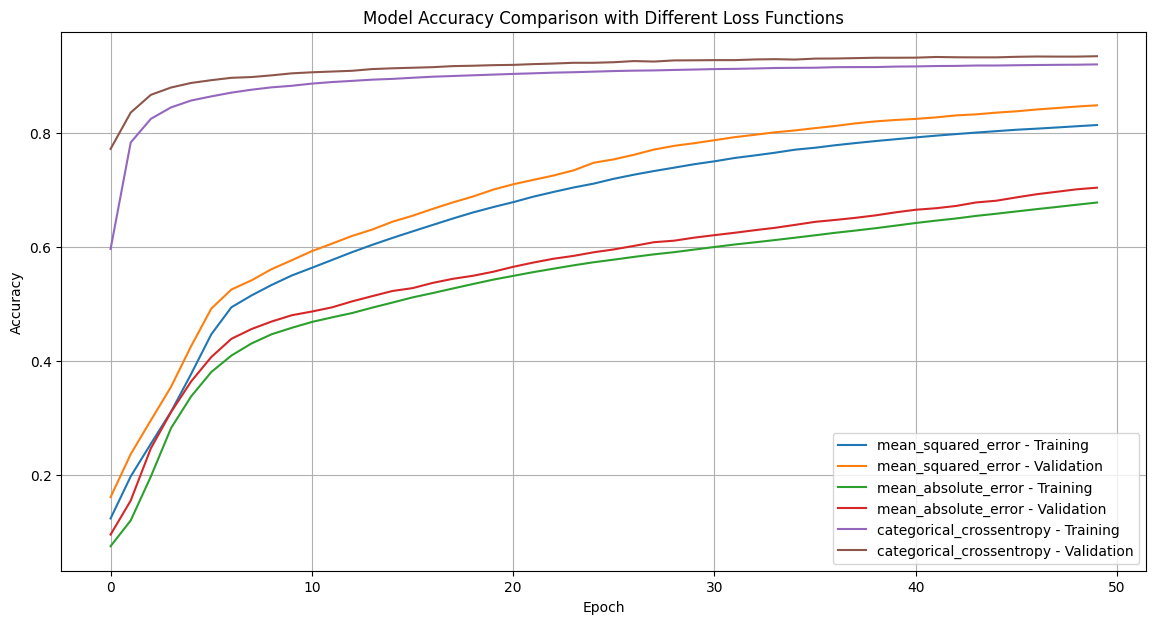


Final validation accuracy for each loss function:
mean_squared_error: 0.8482
mean_absolute_error: 0.7038
categorical_crossentropy: 0.9342

Best loss function: categorical_crossentropy


In [ ]:
# Plot the training and validation accuracy for each loss function
plt.figure(figsize=(14, 7))

for loss_fn, history in histories.items():
    plt.plot(history['accuracy'], label=f'{loss_fn} - Training')
    plt.plot(history['val_accuracy'], label=f'{loss_fn} - Validation')

plt.title('Model Accuracy Comparison with Different Loss Functions')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_comparison.png')
plt.show()

# Print the final validation accuracy for each loss function
print("\nFinal validation accuracy for each loss function:")
for loss_fn, history in histories.items():
    print(f"{loss_fn}: {history['val_accuracy'][-1]:.4f}")

# Determine the best loss function based on final validation accuracy
best_loss_fn = max(histories.items(), key=lambda x: x[1]['val_accuracy'][-1])[0]
print(f"\nBest loss function: {best_loss_fn}")

# **Question 3**

In [ ]:
# Function to create the model with specified number of additional dense layers
def create_model(additional_layers=0):
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Flatten()
    ])

    # Add the first dense layer with tanh activation
    model.add(layers.Dense(10, activation='tanh'))

    # Add additional dense layers with tanh activation
    for _ in range(additional_layers):
        model.add(layers.Dense(10, activation='tanh'))

    # Add final output layer with softmax activation
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [ ]:
# Define the number of additional layers to test
max_additional_layers = 20
histories = {}
val_accuracies = []

In [ ]:
# Train models with increasing number of layers
for additional_layers in range(max_additional_layers+1):
    # Total layers = base layers (2: tanh + softmax) + additional layers
    total_layers = 2 + additional_layers
    print(f"\nTraining model with {total_layers} total layers...")

    # Create a new model instance
    model = create_model(additional_layers)

    # Compile the model with categorical_crossentropy loss
    model.compile(
        optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=30,
        validation_split=0.1,
        verbose=1
    )

    # Store the training history
    histories[additional_layers] = history.history
    val_accuracies.append(history.history['val_accuracy'][-1])


Training model with 2 total layers...
Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3845 - loss: 1.9501 - val_accuracy: 0.6813 - val_loss: 1.3021
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6725 - loss: 1.2719 - val_accuracy: 0.7758 - val_loss: 0.9953
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7563 - loss: 1.0071 - val_accuracy: 0.8393 - val_loss: 0.8000
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8087 - loss: 0.8359 - val_accuracy: 0.8677 - val_loss: 0.6706
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8380 - loss: 0.7167 - val_accuracy: 0.8820 - val_loss: 0.5835
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.6386 - val_accuracy: 0.8922 - val_loss: 0.5231
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8660 - loss: 0.5785 - val_accuracy: 0.8977 - val_loss: 0.4778
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0

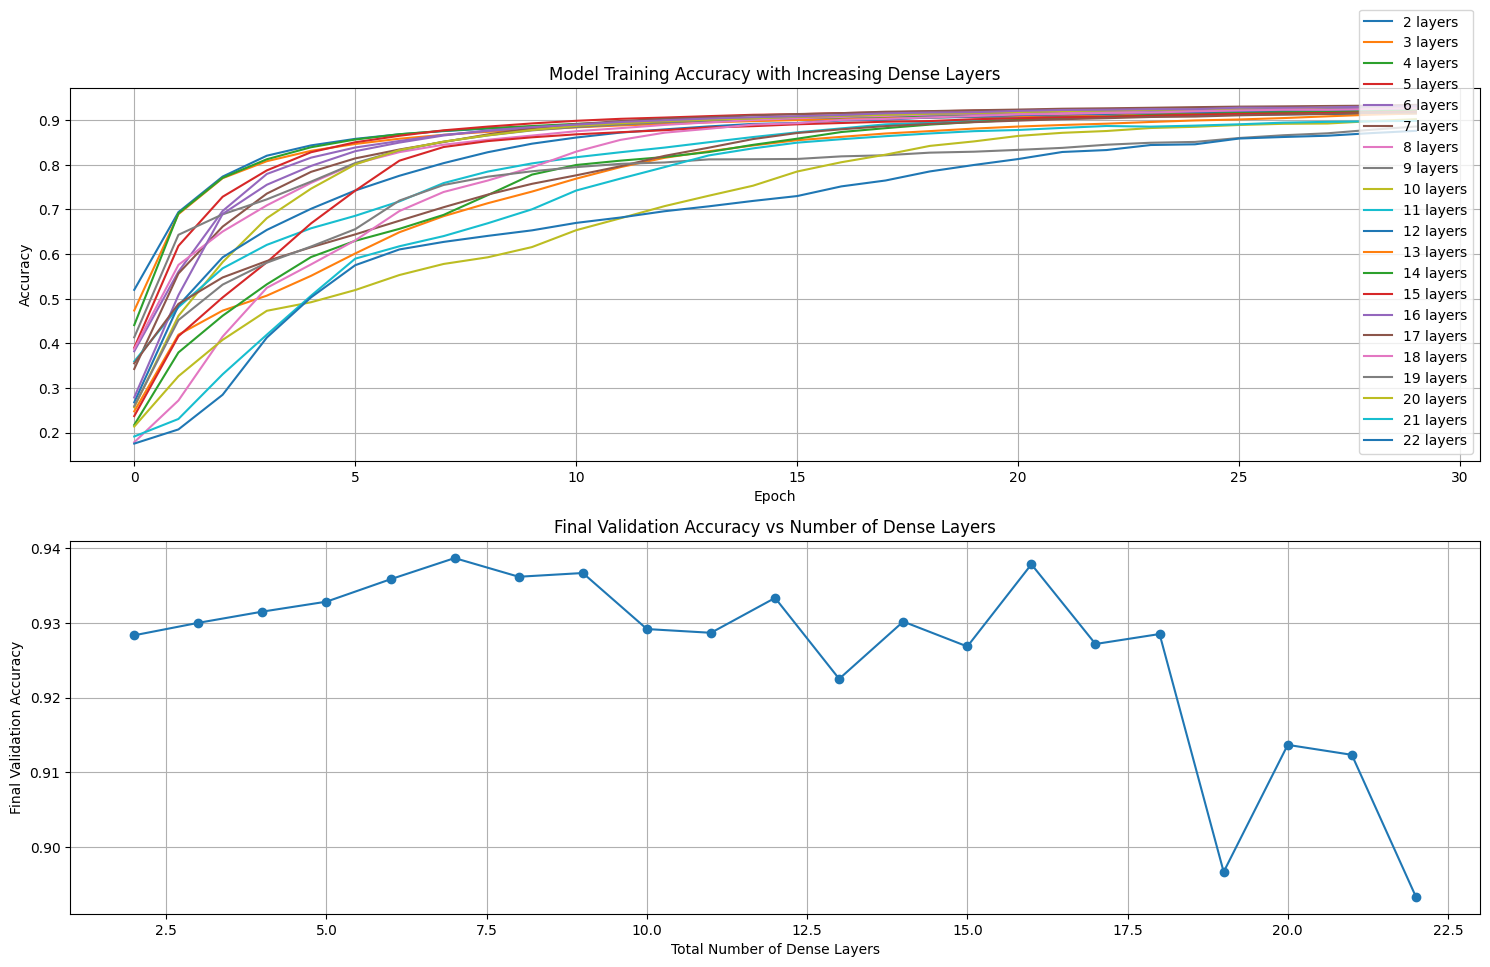


Optimal number of dense layers: 7

Layer performance analysis:
Layers: 2, Accuracy: 0.92833
Layers: 3, Accuracy: 0.93000
Layers: 4, Accuracy: 0.93150
Layers: 5, Accuracy: 0.93283
Layers: 6, Accuracy: 0.93583
Layers: 7, Accuracy: 0.93867
Layers: 8, Accuracy: 0.93617
Layers: 9, Accuracy: 0.93667
Layers: 10, Accuracy: 0.92917
Layers: 11, Accuracy: 0.92867
Layers: 12, Accuracy: 0.93333
Layers: 13, Accuracy: 0.92250
Layers: 14, Accuracy: 0.93017
Layers: 15, Accuracy: 0.92683
Layers: 16, Accuracy: 0.93783
Layers: 17, Accuracy: 0.92717
Layers: 18, Accuracy: 0.92850
Layers: 19, Accuracy: 0.89667
Layers: 20, Accuracy: 0.91367
Layers: 21, Accuracy: 0.91233
Layers: 22, Accuracy: 0.89333


In [ ]:
# Plot the training accuracy curves for each model
plt.figure(figsize=(15, 10))

# Plot all training histories
plt.subplot(2, 1, 1)
for additional_layers, history in histories.items():
    total_layers = 2 + additional_layers
    plt.plot(history['accuracy'], label=f'{total_layers} layers')

plt.title('Model Training Accuracy with Increasing Dense Layers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)

# Plot final validation accuracy vs number of layers
plt.subplot(2, 1, 2)
plt.plot(range(2, max_additional_layers+3), val_accuracies, 'o-')
plt.title('Final Validation Accuracy vs Number of Dense Layers')
plt.xlabel('Total Number of Dense Layers')
plt.ylabel('Final Validation Accuracy')
plt.grid(True)
plt.tight_layout()

plt.savefig('mnist_layers_experiment.png')
plt.show()

# Find the optimal number of layers
optimal_layers = np.argmax(val_accuracies) + 2
print(f"\nOptimal number of dense layers: {optimal_layers}")

# Determine where performance stabilizes or starts decreasing
performance_data = []
for i in range(len(val_accuracies)):
    total_layers = i + 2
    performance_data.append((total_layers, val_accuracies[i]))

print("\nLayer performance analysis:")
for layers, accuracy in performance_data:
    print(f"Layers: {layers}, Accuracy: {accuracy:.5f}")

# **Question 5**

In [ ]:
# Noise injection function
def stripe_noise(data):
  corrupted = np.zeros(data.shape)
  for ex in range(len(data)):
    ov = np.random.choice([0,1])
    idx = np.random.choice(np.arange(28))
    corrupted[ex] = data[ex]
    if ov == 1: corrupted[ex,idx,:] = 225
    else: corrupted[ex,:,idx] = 225

  return corrupted

In [ ]:
# Start over with fresh data to add noise
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Data parameters
num_classes = 10
input_shape = (28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Create corrupted versions of the data (before normalization)
print("Applying stripe noise to training data...")
x_train_corrupted = stripe_noise(x_train)
print("Applying stripe noise to test data...")
x_test_corrupted = stripe_noise(x_test)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_train_corrupted = x_train_corrupted.astype("float32") / 255
x_test_corrupted = x_test_corrupted.astype("float32") / 255

# One-hot encode output labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Applying stripe noise to training data...
Applying stripe noise to test data...


In [ ]:
# Function to create model with optimal architecture (7 total layers)
def create_model():
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(10, activation='tanh'),
        layers.Dense(10, activation='tanh'),
        layers.Dense(10, activation='tanh'),
        layers.Dense(10, activation='tanh'),
        layers.Dense(10, activation='tanh'),
        layers.Dense(10, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='sgd',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

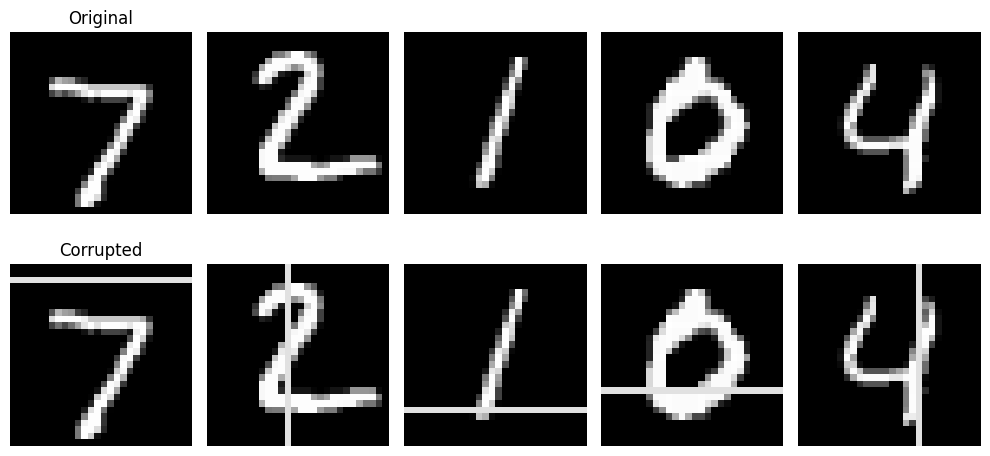

In [ ]:
# Visualize some examples of corrupted images
plt.figure(figsize=(10, 5))
for i in range(5):
    # Original image
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Original')

    # Corrupted image
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test_corrupted[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.title('Corrupted')

plt.tight_layout()
plt.savefig('mnist_corruption_samples.png')

In [ ]:
# Scenario 1: Train on normal, test on corrupted
print("\n===== SCENARIO 1: Train on normal, test on corrupted =====")
model1 = create_model()
history1 = model1.fit(
    x_train, y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.1,
    verbose=1
)

# Evaluate on corrupted test data
score1 = model1.evaluate(x_test_corrupted, y_test, verbose=0)
print(f"Test accuracy (train normal, test corrupted): {score1[1]:.4f}")


===== SCENARIO 1: Train on normal, test on corrupted =====
Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2257 - loss: 2.1681 - val_accuracy: 0.5362 - val_loss: 1.7505
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5750 - loss: 1.6554 - val_accuracy: 0.7285 - val_loss: 1.2542
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7149 - loss: 1.2081 - val_accuracy: 0.7712 - val_loss: 0.9235
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7580 - loss: 0.9352 - val_accuracy: 0.8123 - val_loss: 0.7440
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7979 - loss: 0.7819 - val_accuracy: 0.8485 - val_loss: 0.6368
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.6839 - val_accuracy: 0.8738 - val_loss: 0.5524
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8526 - loss: 0.6042 - val_accuracy: 0.8842 - val_loss: 0.4940
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3

In [ ]:
# Scenario 2: Train on corrupted, test on normal
print("\n===== SCENARIO 2: Train on corrupted, test on normal =====")
model2 = create_model()
history2 = model2.fit(
    x_train_corrupted, y_train,
    batch_size=128,
    epochs=30,
    validation_split=0.1,
    verbose=1
)

# Evaluate on normal test data
score2 = model2.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy (train corrupted, test normal): {score2[1]:.4f}")


===== SCENARIO 2: Train on corrupted, test on normal =====
Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1953 - loss: 2.2093 - val_accuracy: 0.3905 - val_loss: 1.8240
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4257 - loss: 1.7405 - val_accuracy: 0.5765 - val_loss: 1.4177
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5877 - loss: 1.3779 - val_accuracy: 0.6942 - val_loss: 1.1519
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6762 - loss: 1.1453 - val_accuracy: 0.7485 - val_loss: 0.9762
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7287 - loss: 0.9849 - val_accuracy: 0.8023 - val_loss: 0.8393
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7819 - loss: 0.8648 - val_accuracy: 0.8405 - val_loss: 0.7306
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8163 - loss: 0.7499 - val_accuracy: 0.8545 - val_loss: 0.6372
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4

In [ ]:
# Calculate and print accuracy difference
diff = abs(score1[1] - score2[1])
print(f"\nAccuracy difference: {diff:.4f}")


Accuracy difference: 0.1564


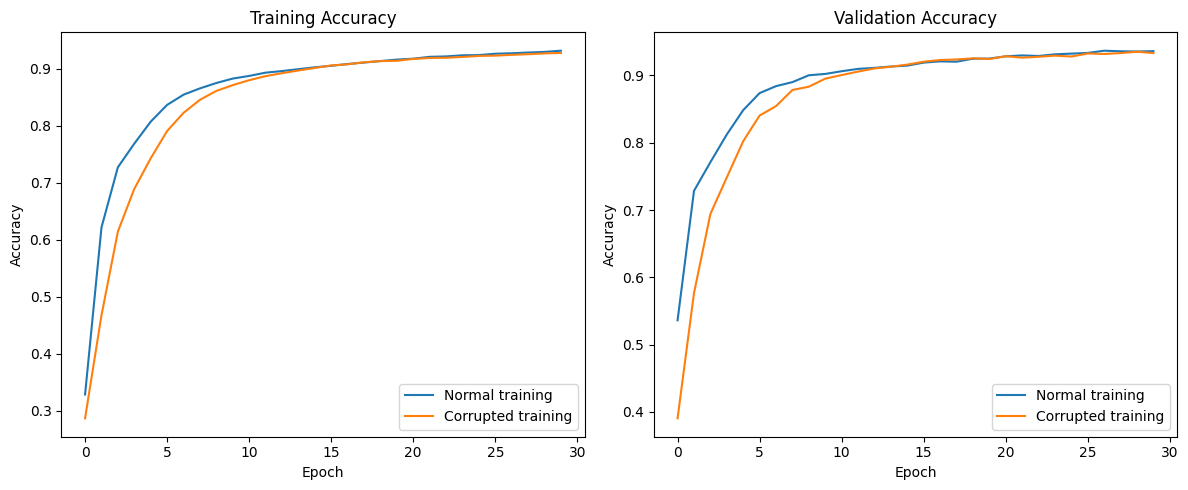

In [ ]:
# Plot the training history
plt.figure(figsize=(12, 5))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Normal training')
plt.plot(history2.history['accuracy'], label='Corrupted training')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history1.history['val_accuracy'], label='Normal training')
plt.plot(history2.history['val_accuracy'], label='Corrupted training')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('mnist_corruption_training.png')

In [ ]:
# Determine which scenario performed worse
if score1[1] < score2[1]:
    print("\nConclusion: Training on normal and testing on corrupted obtains the worse performance.")
else:
    print("\nConclusion: Training on corrupted and testing on normal obtains the worse performance.")


Conclusion: Training on normal and testing on corrupted obtains the worse performance.


# **Question 8**

In [ ]:
import numpy as np
import keras
from keras import layers, regularizers
import matplotlib.pyplot as plt

In [ ]:
# Data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Noise injection function
def stripe_noise(data):
  corrupted = np.zeros(data.shape)
  for ex in range(len(data)):
    ov = np.random.choice([0,1])
    idx = np.random.choice(np.arange(28))
    corrupted[ex] = data[ex]
    if ov == 1: corrupted[ex,idx,:] = 225
    else: corrupted[ex,:,idx] = 225

  return corrupted

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Create corrupted versions of the test data (before normalization)
print("Applying stripe noise to test data...")
x_test_corrupted = stripe_noise(x_test)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_test_corrupted = x_test_corrupted.astype("float32") / 255

# One-hot encode output labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Applying stripe noise to test data...


In [ ]:
# Function to create base model
def create_base_model():
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(128, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Function to create model with dropout
def create_dropout_model():
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(128, activation='tanh'),
        layers.Dropout(0.2),  # Add dropout layer
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Function to create model with L1/L2 regularization
def create_regularized_model():
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(
            128,
            activation='tanh',
            kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)
        ),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
# Experiment 1: Base model with 1 epoch
print("\n===== Experiment 1: Base model, 1 epoch =====")
model1 = create_base_model()
history1 = model1.fit(
    x_train, y_train,
    batch_size=128,
    epochs=1,
    validation_split=0.1,
    verbose=1
)
score1 = model1.evaluate(x_test_corrupted, y_test, verbose=0)
print(f"Test accuracy on corrupted data: {score1[1]:.4f}")


===== Experiment 1: Base model, 1 epoch =====
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8174 - loss: 0.6390 - val_accuracy: 0.9442 - val_loss: 0.2007
Test accuracy on corrupted data: 0.8370


In [ ]:
# Experiment 2: Dropout model with 10 epochs
print("\n===== Experiment 2: Dropout model, 10 epochs =====")
model2 = create_dropout_model()
history2 = model2.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)
score2 = model2.evaluate(x_test_corrupted, y_test, verbose=0)
print(f"Test accuracy on corrupted data: {score2[1]:.4f}")


===== Experiment 2: Dropout model, 10 epochs =====
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8045 - loss: 0.6632 - val_accuracy: 0.9403 - val_loss: 0.2175
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9241 - loss: 0.2610 - val_accuracy: 0.9527 - val_loss: 0.1661
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9400 - loss: 0.2045 - val_accuracy: 0.9607 - val_loss: 0.1411
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9476 - loss: 0.1720 - val_accuracy: 0.9655 - val_loss: 0.1230
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 0.1482 - val_accuracy: 0.9680 - val_loss: 0.1113
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9599 - loss: 0.1327 - val_accuracy: 0.9698 - val_loss: 0.1006
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9642 - loss: 0.1185 - val_accuracy: 0.9718 - val_loss: 0.0932
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 

In [ ]:
# Experiment 3: Regularized model with 10 epochs
print("\n===== Experiment 3: Regularized model (L1/L2), 10 epochs =====")
model3 = create_regularized_model()
history3 = model3.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)
score3 = model3.evaluate(x_test_corrupted, y_test, verbose=0)
print(f"Test accuracy on corrupted data: {score3[1]:.4f}")


===== Experiment 3: Regularized model (L1/L2), 10 epochs =====
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8058 - loss: 2.4503 - val_accuracy: 0.9087 - val_loss: 0.6772
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8891 - loss: 0.7126 - val_accuracy: 0.9108 - val_loss: 0.5956
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8940 - loss: 0.6339 - val_accuracy: 0.9155 - val_loss: 0.5448
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8992 - loss: 0.5942 - val_accuracy: 0.9158 - val_loss: 0.5241
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9059 - loss: 0.5616 - val_accuracy: 0.9243 - val_loss: 0.4962
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9124 - loss: 0.5390 - val_accuracy: 0.9290 - val_loss: 0.4764
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.5215 - val_accuracy: 0.9283 - val_loss: 0.4674
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Experiment 4: Base model with 10 epochs
print("\n===== Experiment 4: Base model, 10 epochs =====")
model4 = create_base_model()
history4 = model4.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)
score4 = model4.evaluate(x_test_corrupted, y_test, verbose=0)
print(f"Test accuracy on corrupted data: {score4[1]:.4f}")


===== Experiment 4: Base model, 10 epochs =====
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8270 - loss: 0.6190 - val_accuracy: 0.9440 - val_loss: 0.2028
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9376 - loss: 0.2248 - val_accuracy: 0.9618 - val_loss: 0.1499
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9543 - loss: 0.1622 - val_accuracy: 0.9663 - val_loss: 0.1255
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9646 - loss: 0.1263 - val_accuracy: 0.9685 - val_loss: 0.1103
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9728 - loss: 0.0990 - val_accuracy: 0.9748 - val_loss: 0.0963
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9774 - loss: 0.0805 - val_accuracy: 0.9747 - val_loss: 0.0867
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9817 - loss: 0.0688 - val_accuracy: 0.9760 - val_loss: 0.0804
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - a

In [ ]:
# Summarize results
results = [
    ("Base model, 1 epoch", score1[1]),
    ("Dropout model, 10 epochs", score2[1]),
    ("Regularized model (L1/L2), 10 epochs", score3[1]),
    ("Base model, 10 epochs", score4[1])
]

print("\n===== Results Summary =====")
for name, acc in results:
    print(f"{name}: {acc:.4f}")

# Determine best model
best_model_idx = np.argmax([score1[1], score2[1], score3[1], score4[1]])
print(f"\nBest model: {results[best_model_idx][0]} with accuracy {results[best_model_idx][1]:.4f}")


===== Results Summary =====
Base model, 1 epoch: 0.8370
Dropout model, 10 epochs: 0.7918
Regularized model (L1/L2), 10 epochs: 0.9063
Base model, 10 epochs: 0.7990

Best model: Regularized model (L1/L2), 10 epochs with accuracy 0.9063


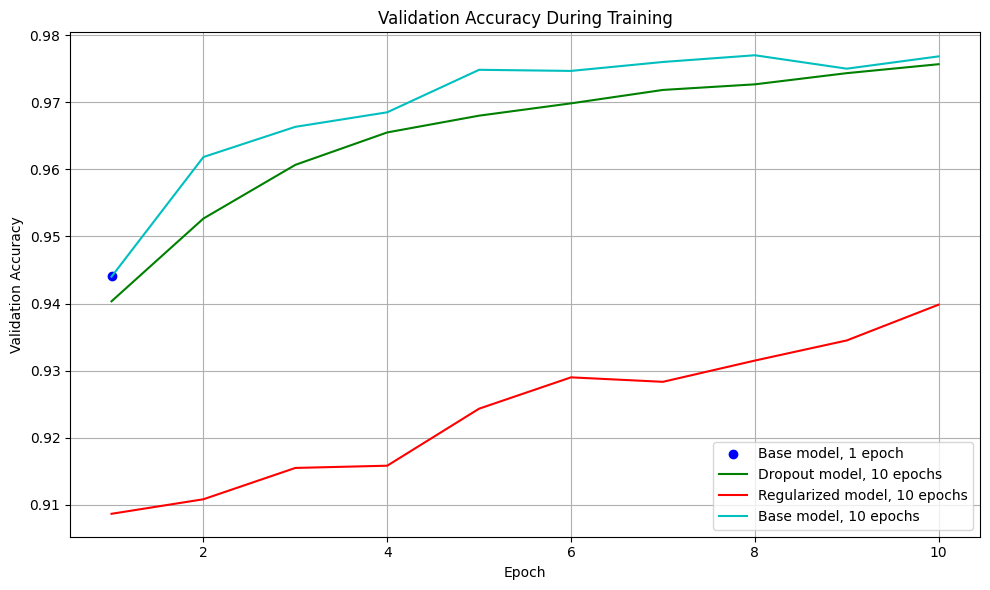

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
epochs1 = range(1, 2)
epochs10 = range(1, 11)

# Plot validation accuracy for each model
plt.plot(epochs1, [history1.history['val_accuracy'][-1]], 'bo', label='Base model, 1 epoch')
plt.plot(epochs10, history2.history['val_accuracy'], 'g-', label='Dropout model, 10 epochs')
plt.plot(epochs10, history3.history['val_accuracy'], 'r-', label='Regularized model, 10 epochs')
plt.plot(epochs10, history4.history['val_accuracy'], 'c-', label='Base model, 10 epochs')

plt.title('Validation Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('mnist_regularization_comparison.png')

## Grid search

Current Date and Time (UTC): 2025-03-07 11:16:58
Current User's Login: davidzeng21
Applying stripe noise to test data...
Total combinations to test: 32
Running experiment 1/32: (64, 1, 0, 0, 0, 'relu', 0.001, 10)
Current best: 0.8267 with:
  Units: 64, Layers: 1, Dropout: 0
  L1: 0, L2: 0, Activation: relu
  Learning rate: 0.001, Epochs: 10
ETA: 0:07:41
--------------------------------------------------
Running experiment 2/32: (64, 1, 0, 0, 0.001, 'relu', 0.001, 10)
Current best: 0.9462 with:
  Units: 64, Layers: 1, Dropout: 0
  L1: 0, L2: 0.001, Activation: relu
  Learning rate: 0.001, Epochs: 10
ETA: 0:07:52
--------------------------------------------------
Running experiment 3/32: (64, 1, 0, 0.001, 0, 'relu', 0.001, 10)
Current best: 0.9462 with:
  Units: 64, Layers: 1, Dropout: 0
  L1: 0, L2: 0.001, Activation: relu
  Learning rate: 0.001, Epochs: 10
ETA: 0:08:02
--------------------------------------------------
Running experiment 4/32: (64, 1, 0, 0.001, 0.001, 'relu', 0.001, 10

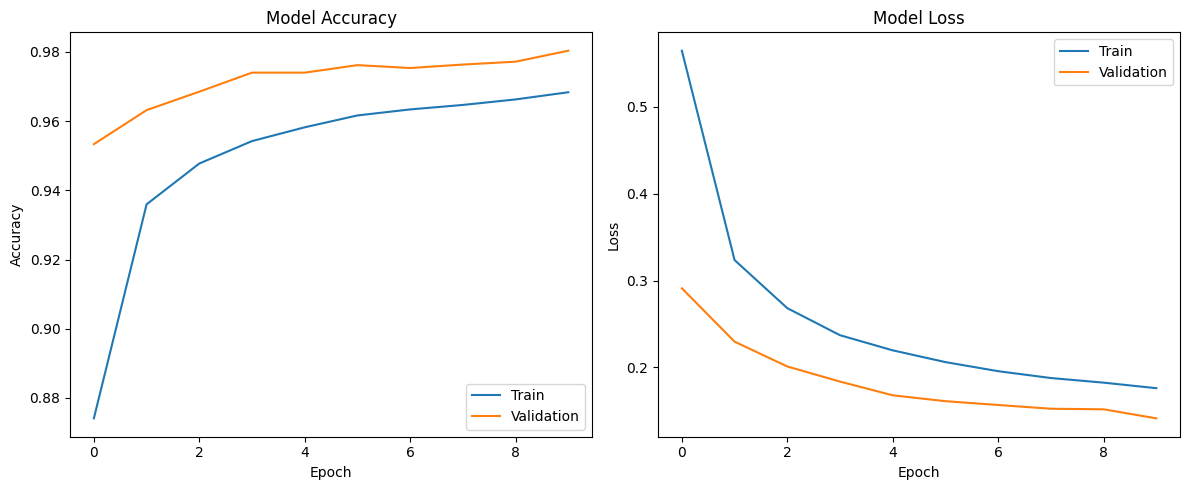

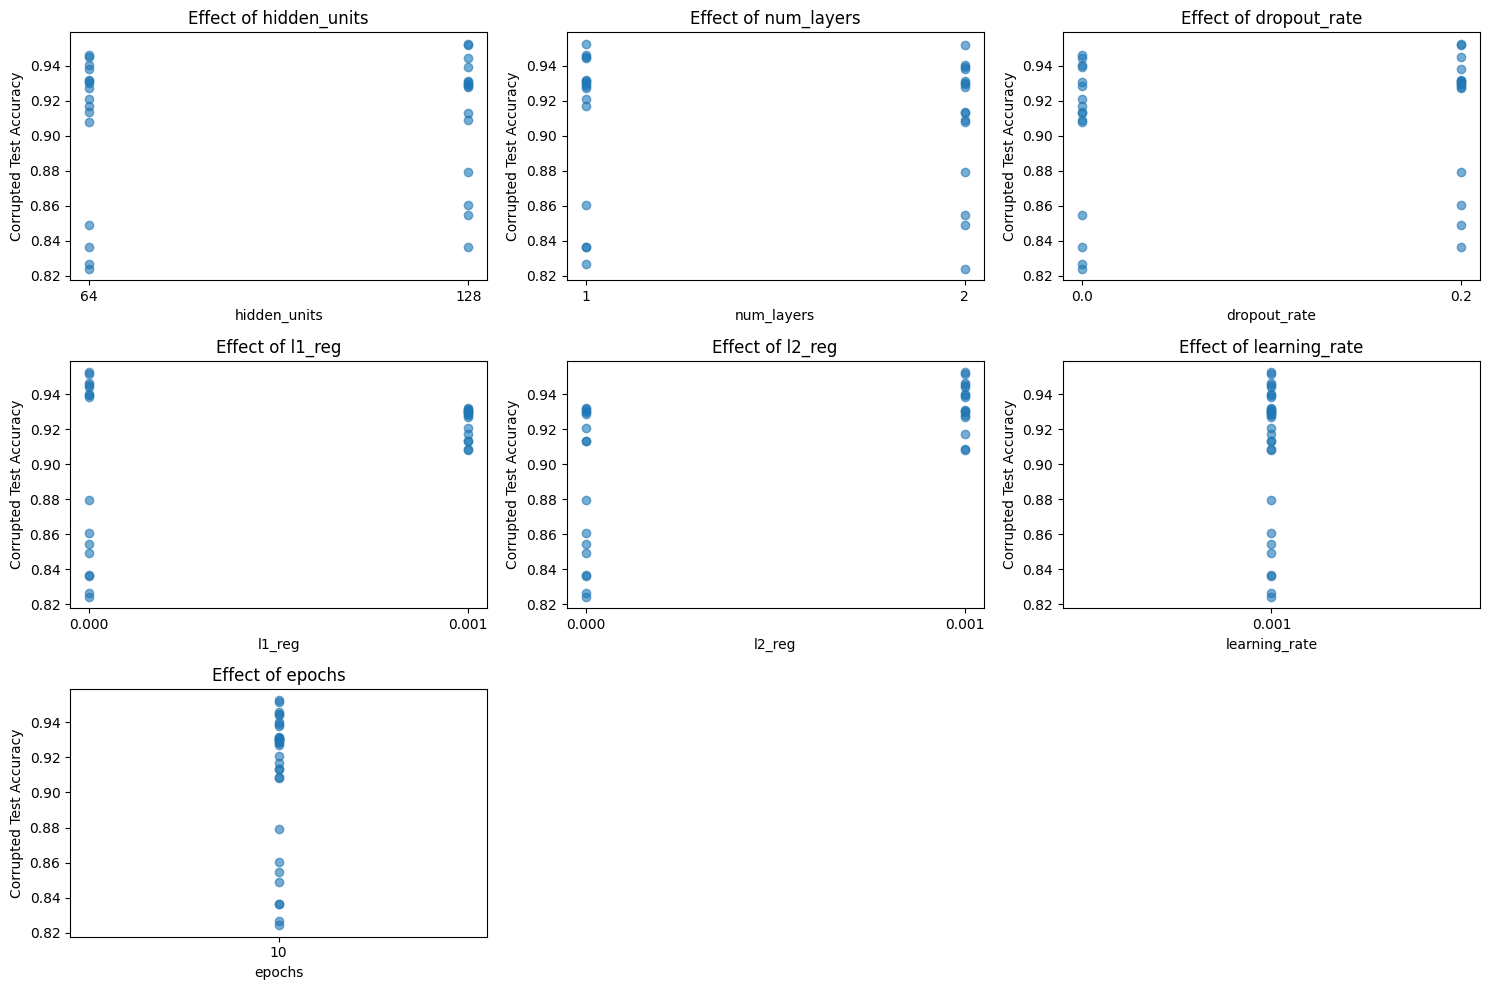

In [ ]:
import numpy as np
import keras
from keras import layers, regularizers
import matplotlib.pyplot as plt
from itertools import product
import time
from datetime import datetime, timedelta

# Current metadata
print("Current Date and Time (UTC): 2025-03-07 11:16:58")
print("Current User's Login: davidzeng21")

# Data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Noise injection function
def stripe_noise(data):
    corrupted = np.zeros(data.shape)
    for ex in range(len(data)):
        ov = np.random.choice([0,1])
        idx = np.random.choice(np.arange(28))
        corrupted[ex] = data[ex]
        if ov == 1: corrupted[ex,idx,:] = 225
        else: corrupted[ex,:,idx] = 225
    return corrupted

# Load the data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Create corrupted versions of the test data
print("Applying stripe noise to test data...")
x_test_corrupted = stripe_noise(x_test)

# Split training data into training and validation sets
val_split = 0.1
val_samples = int(len(x_train) * val_split)
x_val = x_train[-val_samples:]
y_val = y_train[-val_samples:]
x_train = x_train[:-val_samples]
y_train = y_train[:-val_samples]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_val = x_val.astype("float32") / 255
x_test = x_test.astype("float32") / 255
x_test_corrupted = x_test_corrupted.astype("float32") / 255

# One-hot encode output labels
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Function to create a model with given hyperparameters
def create_model(hidden_units, num_layers, dropout_rate, l1_reg, l2_reg, activation, learning_rate):
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))
    model.add(layers.Flatten())

    # Add hidden layers
    for i in range(num_layers):
        model.add(layers.Dense(
            hidden_units,
            activation=activation,
            kernel_regularizer=regularizers.l1_l2(l1=l1_reg, l2=l2_reg)
        ))
        if dropout_rate > 0:
            model.add(layers.Dropout(dropout_rate))

    # Output layer
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define hyperparameter grid
param_grid = {
    'hidden_units': [64, 128, 256],
    'num_layers': [1, 2, 3],
    'dropout_rate': [0, 0.2, 0.5],
    'l1_reg': [0, 0.001],
    'l2_reg': [0, 0.001, 0.01],
    'activation': ['relu', 'tanh'],
    'learning_rate': [0.001, 0.01],
    'epochs': [10, 20]
}

# Create a smaller grid for demonstration purposes
# In a real scenario, you might use the full grid
demo_param_grid = {
    'hidden_units': [64, 128],
    'num_layers': [1, 2],
    'dropout_rate': [0, 0.2],
    'l1_reg': [0, 0.001],
    'l2_reg': [0, 0.001],
    'activation': ['relu'],
    'learning_rate': [0.001],
    'epochs': [10]
}

# Choose which grid to use (demo or full)
use_grid = demo_param_grid  # Change to param_grid for full search

# Generate all combinations of hyperparameters
param_combinations = list(product(
    use_grid['hidden_units'],
    use_grid['num_layers'],
    use_grid['dropout_rate'],
    use_grid['l1_reg'],
    use_grid['l2_reg'],
    use_grid['activation'],
    use_grid['learning_rate'],
    use_grid['epochs']
))

print(f"Total combinations to test: {len(param_combinations)}")

# Function to run a single experiment with given hyperparameters
def run_experiment(hidden_units, num_layers, dropout_rate, l1_reg, l2_reg, activation, learning_rate, epochs):
    model = create_model(hidden_units, num_layers, dropout_rate, l1_reg, l2_reg, activation, learning_rate)

    history = model.fit(
        x_train, y_train,
        batch_size=128,
        epochs=epochs,
        validation_data=(x_val, y_val),
        verbose=0
    )

    # Evaluate on corrupted test data
    score = model.evaluate(x_test_corrupted, y_test, verbose=0)

    return {
        'hidden_units': hidden_units,
        'num_layers': num_layers,
        'dropout_rate': dropout_rate,
        'l1_reg': l1_reg,
        'l2_reg': l2_reg,
        'activation': activation,
        'learning_rate': learning_rate,
        'epochs': epochs,
        'val_accuracy': history.history['val_accuracy'][-1],
        'corrupted_test_accuracy': score[1],
        'history': history.history
    }

# Run grid search
results = []
start_time = time.time()

for i, params in enumerate(param_combinations):
    print(f"Running experiment {i+1}/{len(param_combinations)}: {params}")
    hidden_units, num_layers, dropout_rate, l1_reg, l2_reg, activation, learning_rate, epochs = params

    result = run_experiment(hidden_units, num_layers, dropout_rate, l1_reg, l2_reg, activation, learning_rate, epochs)
    results.append(result)

    # Print current best
    best_idx = np.argmax([r['corrupted_test_accuracy'] for r in results])
    best_params = results[best_idx]

    print(f"Current best: {best_params['corrupted_test_accuracy']:.4f} with:")
    print(f"  Units: {best_params['hidden_units']}, Layers: {best_params['num_layers']}, Dropout: {best_params['dropout_rate']}")
    print(f"  L1: {best_params['l1_reg']}, L2: {best_params['l2_reg']}, Activation: {best_params['activation']}")
    print(f"  Learning rate: {best_params['learning_rate']}, Epochs: {best_params['epochs']}")

    # Calculate and print ETA
    elapsed = time.time() - start_time
    avg_time_per_experiment = elapsed / (i + 1)
    remaining_experiments = len(param_combinations) - (i + 1)
    eta_seconds = avg_time_per_experiment * remaining_experiments
    eta = str(timedelta(seconds=int(eta_seconds)))
    print(f"ETA: {eta}")
    print("-" * 50)

# Sort results by corrupted test accuracy
sorted_results = sorted(results, key=lambda x: x['corrupted_test_accuracy'], reverse=True)

# Print top 5 configurations
print("\n===== Top 5 Configurations =====")
for i, result in enumerate(sorted_results[:5]):
    print(f"Rank {i+1}: Corrupted Test Accuracy: {result['corrupted_test_accuracy']:.4f}")
    print(f"  Hidden Units: {result['hidden_units']}")
    print(f"  Number of Layers: {result['num_layers']}")
    print(f"  Dropout Rate: {result['dropout_rate']}")
    print(f"  L1 Regularization: {result['l1_reg']}")
    print(f"  L2 Regularization: {result['l2_reg']}")
    print(f"  Activation: {result['activation']}")
    print(f"  Learning Rate: {result['learning_rate']}")
    print(f"  Epochs: {result['epochs']}")
    print("-" * 30)

# Get the best model
best_result = sorted_results[0]
print("\n===== Best Model Configuration =====")
print(f"Corrupted Test Accuracy: {best_result['corrupted_test_accuracy']:.4f}")
print(f"Hidden Units: {best_result['hidden_units']}")
print(f"Number of Layers: {best_result['num_layers']}")
print(f"Dropout Rate: {best_result['dropout_rate']}")
print(f"L1 Regularization: {best_result['l1_reg']}")
print(f"L2 Regularization: {best_result['l2_reg']}")
print(f"Activation: {best_result['activation']}")
print(f"Learning Rate: {best_result['learning_rate']}")
print(f"Epochs: {best_result['epochs']}")

# Train the best model once more to verify results
best_params = best_result
final_model = create_model(
    best_params['hidden_units'],
    best_params['num_layers'],
    best_params['dropout_rate'],
    best_params['l1_reg'],
    best_params['l2_reg'],
    best_params['activation'],
    best_params['learning_rate']
)

print("\nTraining best model configuration one more time...")
final_history = final_model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=best_params['epochs'],
    validation_data=(x_val, y_val),
    verbose=1
)

# Evaluate on both normal and corrupted test sets
normal_score = final_model.evaluate(x_test, y_test, verbose=0)
corrupted_score = final_model.evaluate(x_test_corrupted, y_test, verbose=0)

print(f"\nFinal model performance:")
print(f"Normal Test Accuracy: {normal_score[1]:.4f}")
print(f"Corrupted Test Accuracy: {corrupted_score[1]:.4f}")

# Visualize the training history of the best model
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(final_history.history['accuracy'])
plt.plot(final_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(final_history.history['loss'])
plt.plot(final_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('mnist_best_model_training.png')

# Create a visual comparison of hyperparameters vs corrupted test accuracy
plt.figure(figsize=(15, 10))

# For each numeric hyperparameter
for i, param_name in enumerate(['hidden_units', 'num_layers', 'dropout_rate', 'l1_reg', 'l2_reg', 'learning_rate', 'epochs']):
    plt.subplot(3, 3, i+1)
    param_values = [result[param_name] for result in results]
    accuracies = [result['corrupted_test_accuracy'] for result in results]

    # Create a scatter plot
    plt.scatter(param_values, accuracies, alpha=0.6)
    plt.title(f'Effect of {param_name}')
    plt.xlabel(param_name)
    plt.ylabel('Corrupted Test Accuracy')
    if len(set(param_values)) < 5:  # If few discrete values
        plt.xticks(sorted(list(set(param_values))))

# For activation function (categorical)
activations = sorted(list(set([result['activation'] for result in results])))
if len(activations) > 1:
    plt.subplot(3, 3, 8)
    activation_accuracies = {}
    for activation in activations:
        act_results = [r['corrupted_test_accuracy'] for r in results if r['activation'] == activation]
        activation_accuracies[activation] = np.mean(act_results)

    plt.bar(activation_accuracies.keys(), activation_accuracies.values())
    plt.title('Effect of Activation Function')
    plt.ylabel('Avg Corrupted Test Accuracy')

plt.tight_layout()
plt.savefig('mnist_hyperparameter_analysis.png')

# Save the best model configuration
best_model_config = {
    'hidden_units': best_result['hidden_units'],
    'num_layers': best_result['num_layers'],
    'dropout_rate': best_result['dropout_rate'],
    'l1_reg': best_result['l1_reg'],
    'l2_reg': best_result['l2_reg'],
    'activation': best_result['activation'],
    'learning_rate': best_result['learning_rate'],
    'epochs': best_result['epochs'],
    'normal_test_accuracy': float(normal_score[1]),
    'corrupted_test_accuracy': float(corrupted_score[1])
}

print("\nSaving best model configuration...")
import json
with open('best_mnist_model_config.json', 'w') as f:
    json.dump(best_model_config, f, indent=2)

print("Grid search completed!")

In [ ]:
# prompt: print out the best model config

import json

with open('best_mnist_model_config.json', 'r') as f:
    best_model_config = json.load(f)

print("\n===== Best Model Configuration =====")
for key, value in best_model_config.items():
    print(f"{key}: {value}")



===== Best Model Configuration =====
hidden_units: 128
num_layers: 1
dropout_rate: 0.2
l1_reg: 0
l2_reg: 0.001
activation: relu
learning_rate: 0.001
epochs: 10
normal_test_accuracy: 0.9745000004768372
corrupted_test_accuracy: 0.9559000134468079
